In [365]:
import torch
import matplotlib.pyplot as plt

In [366]:
xtrain = np.load('data/xtrain.npy')
ytrain = np.load('data/ytrain.npy')

In [367]:
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self, outputs=8):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(65536, 1024)
        self.fc2 = nn.Linear(1024, outputs)
        self.dropout = nn.Dropout(0.3)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = torch.flatten(x)
        x = F.relu(self.fc1(self.dropout(x)))
        x = self.fc2(self.dropout(x))
        
        return x
    
class MoreDeepCNN(nn.Module):
    def __init__(self, outputs=8):
        super(MoreDeepCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 64, 3, padding=1)
        self.conv2 = nn.Conv2d(64, 128, 3, padding=1)
        self.conv3 = nn.Conv2d(128, 128, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv4 = nn.Conv2d(128, 128, 3, padding=1)
        self.conv5 = nn.Conv2d(128, 128, 3, padding=1)
        self.conv6 = nn.Conv2d(128, 128, 3, padding=1)
        self.fc1 = nn.Linear(2048, 1024)
        self.fc2 = nn.Linear(1024, outputs)
        self.dropout = nn.Dropout(0.3)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        x = self.pool(F.relu(self.conv5(x)))
        x = self.pool(F.relu(self.conv6(x)))
        x = torch.flatten(x)
        x = F.relu(self.fc1(self.dropout(x)))
        x = self.fc2(self.dropout(x))
        
        return x
    
class AdvancedCNN(nn.Module):
    def __init__(self, outputs=8):
        super(AdvancedCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 64, 3, padding=1)
        self.conv2 = nn.Conv2d(64, 128, 3, padding=1)
        self.conv3 = nn.Conv2d(128, 128, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv4 = nn.Conv2d(128, 128, 3, padding=1)
        self.conv5 = nn.Conv2d(128, 64, 3, padding=1)
        self.conv6 = nn.Conv2d(64, 32, 3, padding=1)
        self.conv7 = nn.Conv2d(32, 16, 3, padding=1)
        self.conv8 = nn.Conv2d(16, 16, 3, padding=1)
        self.fc1 = nn.Linear(16384, 256)
        self.fc2 = nn.Linear(256, 8)
        self.dropout = nn.Dropout(0.3)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.pool(F.relu(self.conv3(x)))
        x = F.relu(self.conv4(x))
        x = F.relu(self.conv5(x))
        x = self.pool(F.relu(self.conv6(x)))
        x = F.relu(self.conv7(x))
        x = self.pool(F.relu(self.conv8(x)))
        x = torch.flatten(x)
        x = F.relu(self.fc1(self.dropout(x)))
        x = F.relu(self.fc2(x))
        return x

In [368]:
model = AdvancedCNN()
model.load_state_dict(torch.load('cnn.pt'))
model.eval()

AdvancedCNN(
  (conv1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv6): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv7): Conv2d(32, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv8): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=16384, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=8, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)

In [369]:
device = torch.device('cpu')

In [370]:
def predict(data_loader, model):
    '''
    Predict keypoints
    Args:
        data_loader (DataLoader): DataLoader for Dataset
        model (nn.Module): trained model for prediction.
    Return:
        predictions (array-like): keypoints in float (no. of images x keypoints).
    '''
    
    model.eval() # prep model for evaluation

    with torch.no_grad():
        for i, batch in enumerate(data_loader):
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(batch.to(device)).cpu().numpy()
            if i == 0:
                predictions = output
            else:
                predictions = np.vstack((predictions, output))
    
    return predictions

In [371]:
import numpy as np
xtest = np.load('data/xtest.npy')

In [372]:
def view_image(img, mark):
    img = img.reshape((256, 256))
    mark = 256*mark.reshape((4, 2))
    plt.imshow(img, cmap='gray')
    plt.plot(mark[0][0], mark[0][1], 'bo')
    plt.plot(mark[1][0], mark[1][1], 'bo')
    plt.plot(mark[2][0], mark[2][1], 'bo')
    plt.plot(mark[3][0], mark[3][1], 'bo')
    plt.show()

In [373]:
class Normalize(object):
    def __call__(self, data):
        return data/255.
class Reshape(object):
    def __call__(self, data):
        return data.reshape((1, 256, 256))

In [374]:
from torchvision import transforms

tsfm = transforms.Compose([Normalize(), Reshape()])
testset = TestDataset(xtest, transforms=tsfm)
test_loader = torch.utils.data.DataLoader(testset, batch_size=1)

In [375]:
class TestDataset(torch.utils.data.Dataset):
    def __init__(self, data, transforms = None):
        self.data = torch.as_tensor(data, dtype=torch.float32)
        self.transforms = transforms
    def __getitem__(self, idx):
        data = self.data[idx].reshape((1, 256, 256, 1))
        if self.transforms is not None:
            data = self.transforms(self.data[idx])
        return data
    def __len__(self):
        return len(self.data)

In [376]:
predicted_mask = predict(test_loader, model)

In [377]:
predicted_mask

array([[0.2635907 , 0.08044798, 0.2048139 , 0.9331584 , 0.7945193 ,
        0.92457896, 0.7149466 , 0.1062649 ],
       [0.29224882, 0.10428729, 0.20255236, 0.8518266 , 0.7722904 ,
        0.8887629 , 0.7185558 , 0.12608546],
       [0.3266722 , 0.04729586, 0.26426557, 0.8861856 , 0.8571086 ,
        0.9246335 , 0.79428023, 0.06855528],
       [0.32874903, 0.08378633, 0.26992407, 0.9093302 , 0.8585787 ,
        0.92466295, 0.7815386 , 0.09741494],
       [0.27852985, 0.06307878, 0.22961119, 0.91297305, 0.7952978 ,
        0.9204733 , 0.7400601 , 0.06957594]], dtype=float32)

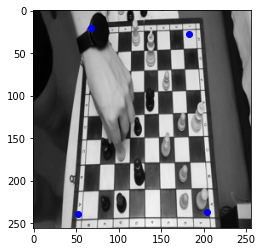

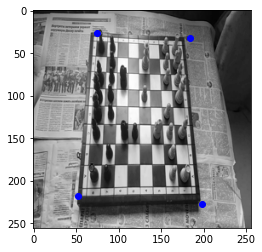

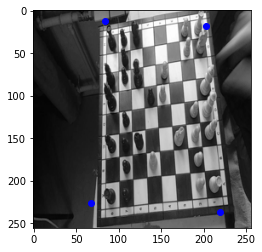

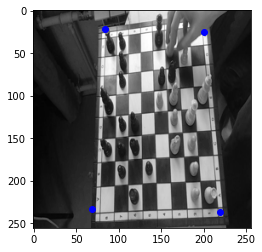

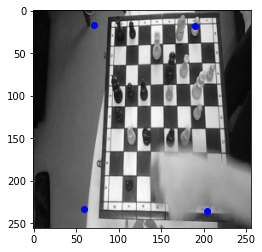

In [378]:
for i in range(5):
    view_image(xtest[i], predicted_mask[i])